# Forestfires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/SVM/forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [20]:
data.shape

(517, 31)

In [21]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [22]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [23]:
data.drop_duplicates()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [24]:
data.shape

(517, 31)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [26]:
data.drop(columns=['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],inplace=True)

In [27]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [29]:
data.iloc[:,0]=labelencoder.fit_transform(data.iloc[:,0])
data.iloc[:,1]=labelencoder.fit_transform(data.iloc[:,1])
data.iloc[:,-1]=labelencoder.fit_transform(data.iloc[:,-1])

In [30]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [35]:
cr=data.corr()
cr

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,0.031054,-0.032559
day,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,0.018916,-0.003550
FFMC,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,-0.022063
DMC,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.034715
DC,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.019428
ISI,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008726
temp,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.006021
RH,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.045243
wind,-0.141131,-0.034504,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.059113
rain,-0.076800,0.052881,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.050001


(array([[517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [268., 209.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 86.,   3.,  15.,  25.,  27.,  91., 219.,  51.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 12 BarContainer ob

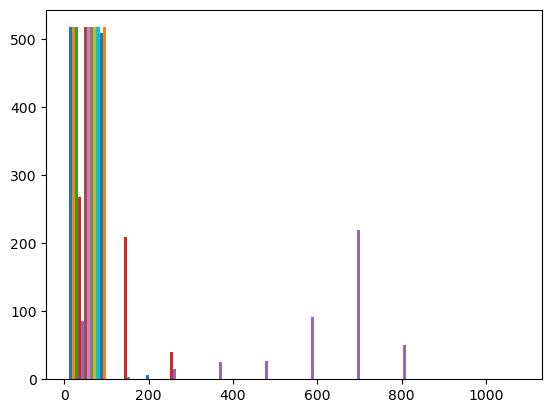

In [33]:
plt.hist(data)

<AxesSubplot:>

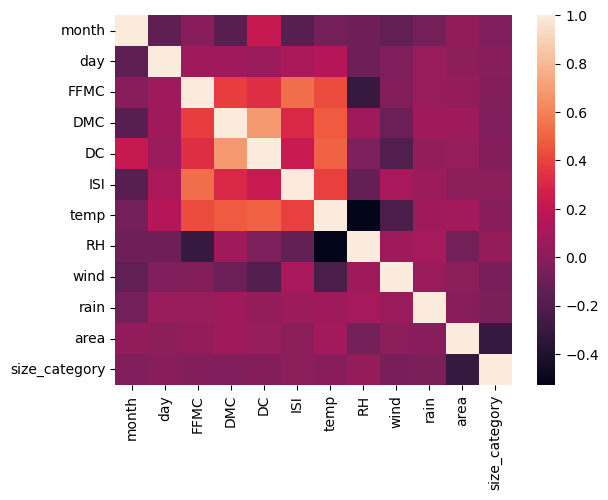

In [36]:
import seaborn as sns
sns.heatmap(cr)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [38]:
data.drop(columns=['month','day'],inplace=True)

In [39]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [40]:
X=data.iloc[:,0:9]
Y=data.iloc[:,-1]

In [41]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [42]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)


In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((361, 9), (361,), (156, 9), (156,))

In [45]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001, 0.0001],
                          'gamma': [100, 50, 0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [46]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.9084084084084084)

In [47]:
clf = SVC(C= 15, gamma = 0.0001)
clf.fit(X_train , y_train)
y_pred_train= clf.predict(X_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

Accuracy = 94.45983379501385
[[ 82  19]
 [  1 259]]


In [48]:
y_pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy = 91.02564102564102
[[ 26  12]
 [  2 116]]


# Company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/SVM/SalaryData_Train%281%29.csv")
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
data.shape

(30161, 14)

In [5]:
data[data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [6]:
data=data.drop_duplicates()
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
data.shape

(26903, 14)

In [8]:
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
data_label=data.copy()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_label.iloc[:, 1] = labelencoder.fit_transform(data_label.iloc[:,1])
data_label.iloc[:, 2] = labelencoder.fit_transform(data_label.iloc[:,2])
data_label.iloc[:, 4] = labelencoder.fit_transform(data_label.iloc[:,4])
data_label.iloc[:, 5] = labelencoder.fit_transform(data_label.iloc[:,5])
data_label.iloc[:, 6] = labelencoder.fit_transform(data_label.iloc[:,6])
data_label.iloc[:, 7] = labelencoder.fit_transform(data_label.iloc[:,7])
data_label.iloc[:, 8] = labelencoder.fit_transform(data_label.iloc[:,8])
data_label.iloc[:, 12] = labelencoder.fit_transform(data_label.iloc[:,12])
data_label.iloc[:, 13] = labelencoder.fit_transform(data_label.iloc[:,13])

In [10]:
data=data_label
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [11]:
cr=data.corr()
cr

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.075184,0.002717,0.038048,-0.245062,-0.004570,-0.231111,0.040457,0.070434,0.077235,0.052684,0.072529,0.010626,0.223502
workclass,0.075184,1.000000,0.021289,0.037806,-0.031961,0.014047,-0.070996,0.051479,0.079380,0.033217,0.002739,0.047169,0.012683,0.016577
education,0.002717,0.021289,1.000000,0.359940,-0.040931,-0.025890,-0.010801,0.005572,-0.029841,0.034550,0.020469,0.058709,0.076605,0.090094
educationno,0.038048,0.037806,0.359940,1.000000,-0.066536,0.084300,-0.092236,0.035215,0.010941,0.126085,0.080025,0.145491,0.096279,0.332178
maritalstatus,-0.245062,-0.031961,-0.040931,-0.066536,1.000000,0.015094,0.155553,-0.073628,-0.108928,-0.042087,-0.033890,-0.175692,-0.029585,-0.184559
occupation,-0.004570,0.014047,-0.025890,0.084300,0.015094,1.000000,-0.063950,0.008183,0.066919,0.019724,0.010873,0.023073,0.003024,0.050711
relationship,-0.231111,-0.070996,-0.010801,-0.092236,0.155553,-0.063950,1.000000,-0.113708,-0.586804,-0.063322,-0.070351,-0.248745,-0.006126,-0.247438
race,0.040457,0.051479,0.005572,0.035215,-0.073628,0.008183,-0.113708,1.000000,0.085786,0.020049,0.032111,0.056460,0.118907,0.079109
sex,0.070434,0.079380,-0.029841,0.010941,-0.108928,0.066919,-0.586804,0.085786,1.000000,0.053490,0.053084,0.228767,-0.004930,0.217360
capitalgain,0.077235,0.033217,0.034550,0.126085,-0.042087,0.019724,-0.063322,0.020049,0.053490,1.000000,-0.036023,0.079403,0.012902,0.228865


<AxesSubplot:>

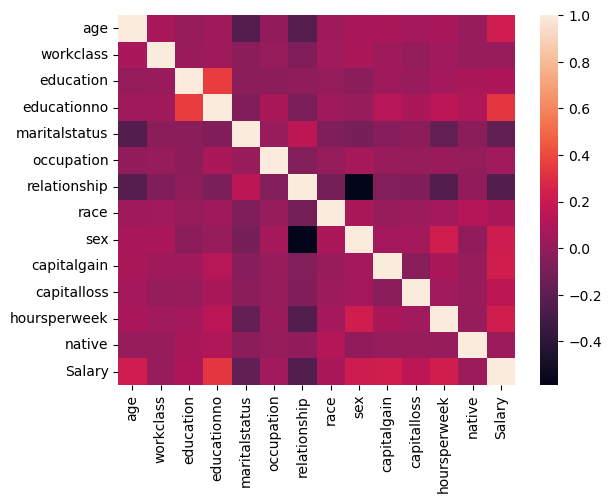

In [12]:
import seaborn as sns
sns.heatmap(cr)

(array([[2.6903e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.6903e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.6903e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.6903e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.6903e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.6903e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.6903e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.6903e+04, 0.0000

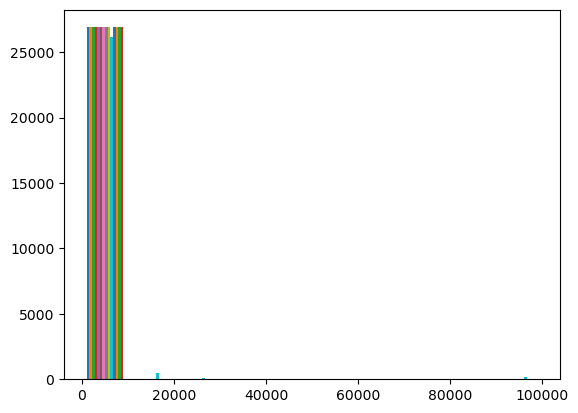

In [13]:
plt.hist(data)

In [14]:
data.value_counts('Salary')

Salary
0    20023
1     6880
dtype: int64

In [15]:
X=data.iloc[:,0:13]
Y=data.iloc[:,13]

In [16]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37
30155,22,2,15,10,4,10,1,4,1,0,0,40,37
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37


In [17]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30154    1
30155    0
30156    0
30158    0
30160    1
Name: Salary, Length: 26903, dtype: int32

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18832, 13), (18832,), (8071, 13), (8071,))

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [23]:
clf=SVC()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 79.81662743154504


array([[5819,  189],
       [1440,  623]], dtype=int64)

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# company test

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data1=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/SVM/SalaryData_Test%281%29.csv")
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [28]:
data1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [30]:
data1.shape

(15060, 14)

In [34]:
data1=data1.drop_duplicates()
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [35]:
data1.shape

(14130, 14)

In [36]:
data_label=data1.copy()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_label.iloc[:, 1] = labelencoder.fit_transform(data_label.iloc[:,1])
data_label.iloc[:, 2] = labelencoder.fit_transform(data_label.iloc[:,2])
data_label.iloc[:, 4] = labelencoder.fit_transform(data_label.iloc[:,4])
data_label.iloc[:, 5] = labelencoder.fit_transform(data_label.iloc[:,5])
data_label.iloc[:, 6] = labelencoder.fit_transform(data_label.iloc[:,6])
data_label.iloc[:, 7] = labelencoder.fit_transform(data_label.iloc[:,7])
data_label.iloc[:, 8] = labelencoder.fit_transform(data_label.iloc[:,8])
data_label.iloc[:, 12] = labelencoder.fit_transform(data_label.iloc[:,12])
data_label.iloc[:, 13] = labelencoder.fit_transform(data_label.iloc[:,13])

In [45]:
data1=data_label
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [38]:
cr=data.corr()

In [39]:
cr

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.075184,0.002717,0.038048,-0.245062,-0.004570,-0.231111,0.040457,0.070434,0.077235,0.052684,0.072529,0.010626,0.223502
workclass,0.075184,1.000000,0.021289,0.037806,-0.031961,0.014047,-0.070996,0.051479,0.079380,0.033217,0.002739,0.047169,0.012683,0.016577
education,0.002717,0.021289,1.000000,0.359940,-0.040931,-0.025890,-0.010801,0.005572,-0.029841,0.034550,0.020469,0.058709,0.076605,0.090094
educationno,0.038048,0.037806,0.359940,1.000000,-0.066536,0.084300,-0.092236,0.035215,0.010941,0.126085,0.080025,0.145491,0.096279,0.332178
maritalstatus,-0.245062,-0.031961,-0.040931,-0.066536,1.000000,0.015094,0.155553,-0.073628,-0.108928,-0.042087,-0.033890,-0.175692,-0.029585,-0.184559
occupation,-0.004570,0.014047,-0.025890,0.084300,0.015094,1.000000,-0.063950,0.008183,0.066919,0.019724,0.010873,0.023073,0.003024,0.050711
relationship,-0.231111,-0.070996,-0.010801,-0.092236,0.155553,-0.063950,1.000000,-0.113708,-0.586804,-0.063322,-0.070351,-0.248745,-0.006126,-0.247438
race,0.040457,0.051479,0.005572,0.035215,-0.073628,0.008183,-0.113708,1.000000,0.085786,0.020049,0.032111,0.056460,0.118907,0.079109
sex,0.070434,0.079380,-0.029841,0.010941,-0.108928,0.066919,-0.586804,0.085786,1.000000,0.053490,0.053084,0.228767,-0.004930,0.217360
capitalgain,0.077235,0.033217,0.034550,0.126085,-0.042087,0.019724,-0.063322,0.020049,0.053490,1.000000,-0.036023,0.079403,0.012902,0.228865


<AxesSubplot:>

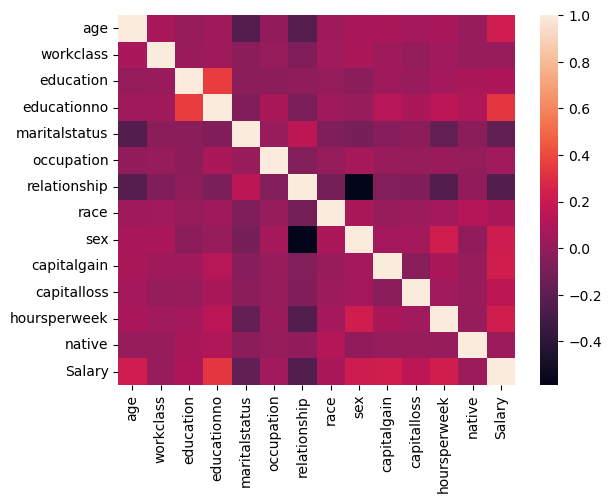

In [40]:
sns.heatmap(cr)

(array([[1.4130e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4130e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4130e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4130e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4130e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4130e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4130e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4130e+04, 0.0000

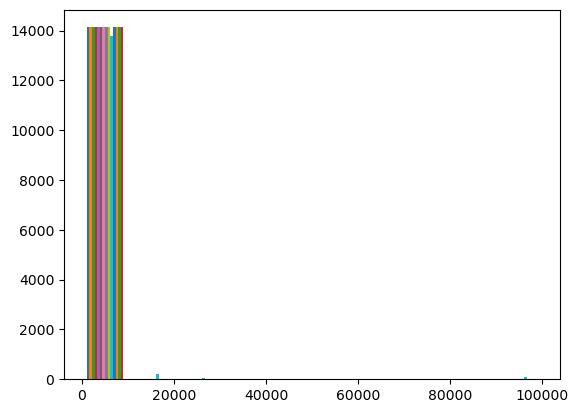

In [44]:
plt.hist(data1)

In [46]:
X=data1.iloc[:,0:13]
Y=data1.iloc[:,13]

In [47]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [48]:
Y

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 14130, dtype: int32

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [52]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((9891, 13), (4239, 13), (9891,), (4239,))

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [57]:
clf=SVC()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(Y_test,y_pred)*100
print("Accuracy=",acc)
confusion_matrix(Y_test,y_pred)

Accuracy= 79.80655815050719


array([[3089,   90],
       [ 766,  294]], dtype=int64)

In [58]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])